#Load and Visualize the Faces Dataset
Now that the runtime is set up, let’s load the Faces Dataset using fetch_olivetti_faces from sklearn.datasets. We’ll also visualize a few images from the dataset to understand what we are working with.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Shape of the dataset: (400, 4096)
Number of labels: 40


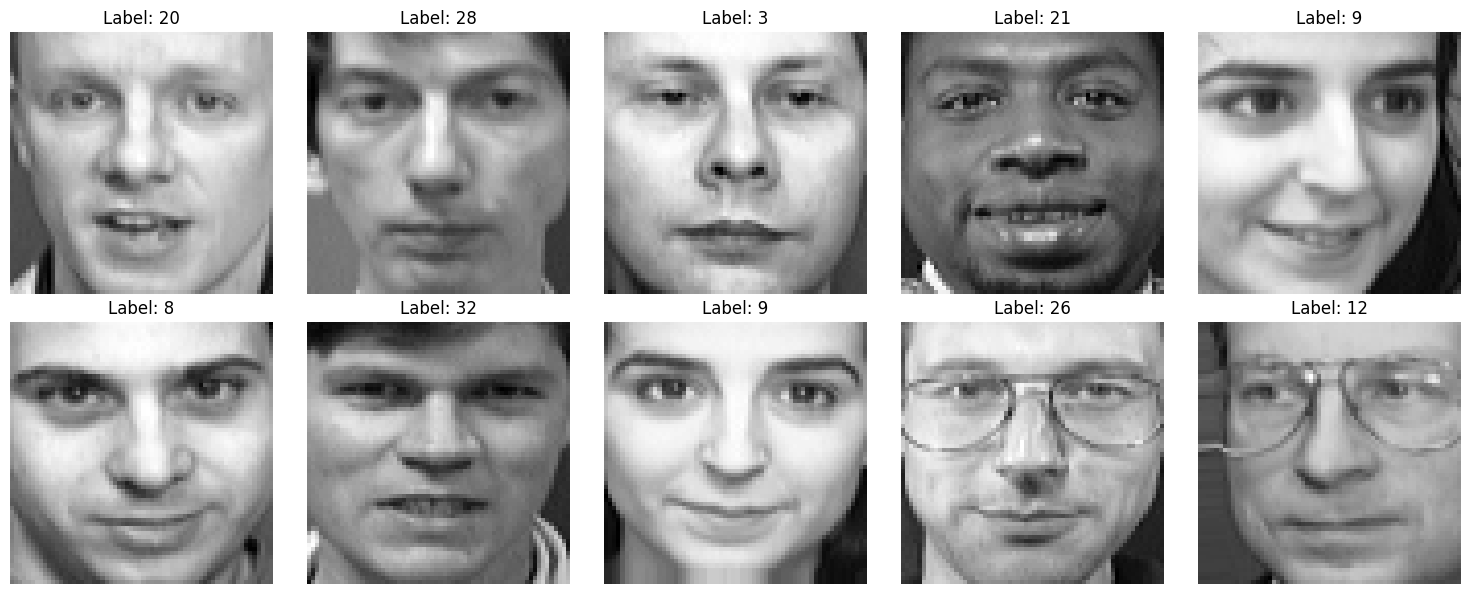

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np

# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = faces.data, faces.target

# Check the shape of the data
print(f"Shape of the dataset: {X.shape}")
print(f"Number of labels: {len(np.unique(y))}")

# Visualize some images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


#Apply and Compare Dimensionality Reduction Techniques
Now that you’ve visualized the dataset, the next step is to apply various dimensionality reduction techniques. We’ll start with Randomized PCA and progressively move to other methods. After reducing the dimensions, we’ll visualize the results to compare their effectiveness.

Code to Apply and Visualize Randomized PCA

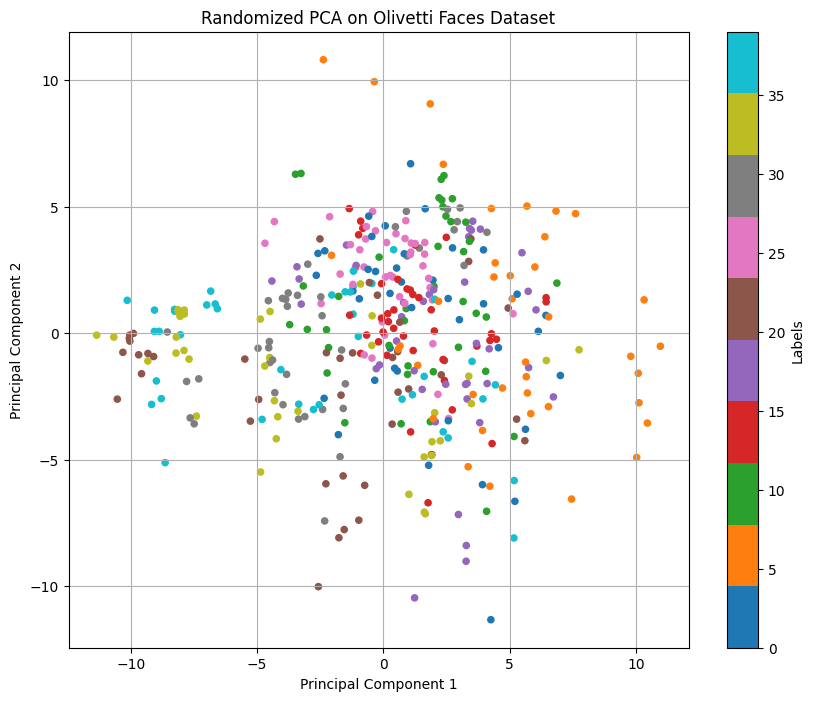

In [2]:
# Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce dimensions using Randomized PCA
n_components = 2  # Number of dimensions to reduce to
randomized_pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_pca = randomized_pca.fit_transform(X)

# Scatter plot of the reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("Randomized PCA on Olivetti Faces Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

#t-SNE for Nonlinear Dimensionality Reduction
t-SNE is a powerful nonlinear dimensionality reduction technique, particularly effective for visualizing high-dimensional datasets like this one.

Code for t-SNE with Interactive Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


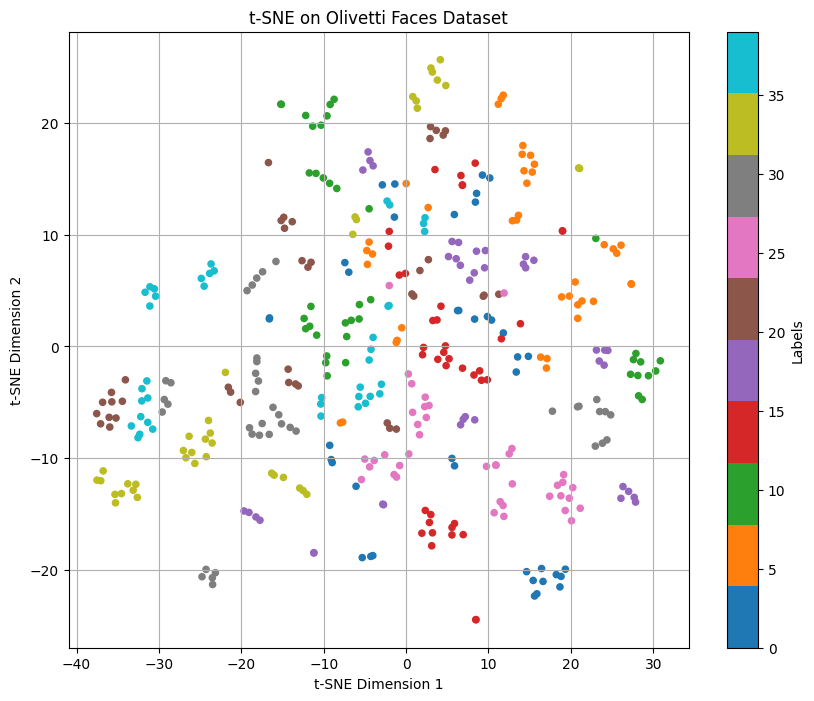

In [3]:
# Import t-SNE
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("t-SNE on Olivetti Faces Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


#Apply and Visualize UMAP (Uniform Manifold Approximation and Projection)
UMAP is another nonlinear dimensionality reduction technique, often considered faster and more efficient than t-SNE, especially for large datasets.

Code for UMAP with Interactive Visualization
First, you need to install the umap-learn package if it's not already available:

In [4]:
# Install UMAP if not already installed
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


#using the following code to apply UMAP and visualize the results:

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


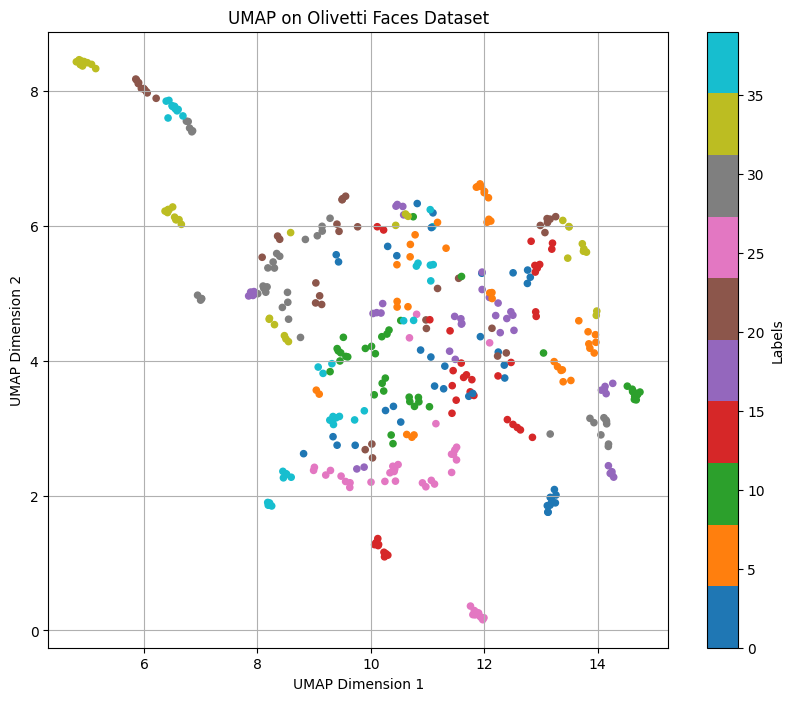

In [5]:
# Import UMAP
import umap.umap_ as umap

# Reduce dimensions using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Visualize the UMAP results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("UMAP on Olivetti Faces Dataset")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()


#Apply and Visualize ISOMAP
ISOMAP (Isometric Mapping) is a nonlinear dimensionality reduction technique that preserves geodesic distances between points, making it useful for datasets with a curved manifold structure.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

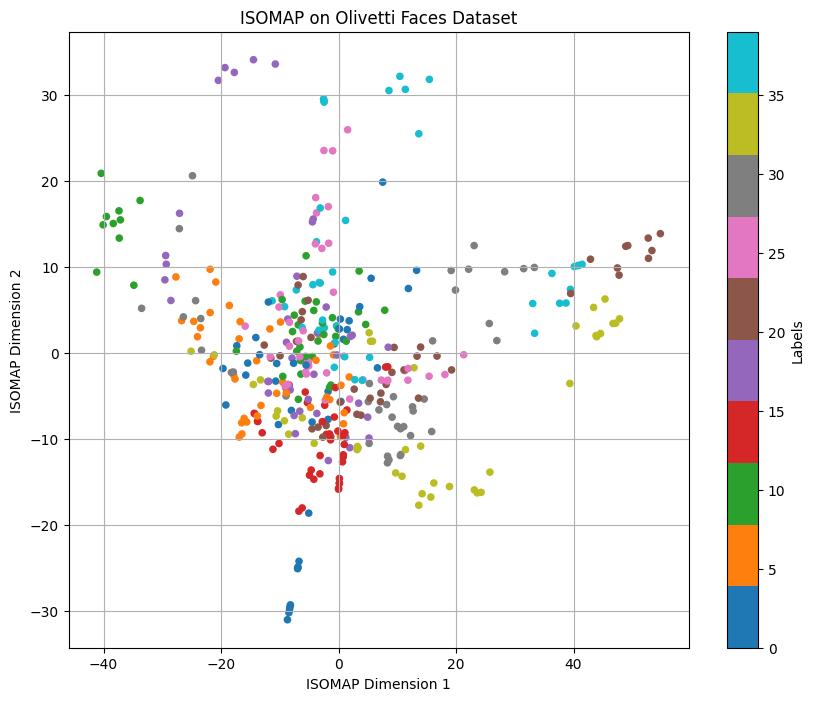

In [6]:
# Import ISOMAP
from sklearn.manifold import Isomap

# Reduce dimensions using ISOMAP
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Visualize the ISOMAP results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("ISOMAP on Olivetti Faces Dataset")
plt.xlabel("ISOMAP Dimension 1")
plt.ylabel("ISOMAP Dimension 2")
plt.grid(True)
plt.show()


#Apply and Visualize Kernel PCA
Kernel PCA extends standard PCA by applying kernel functions, enabling it to capture nonlinear structures in the data. It’s a powerful tool when your dataset has a complex structure.

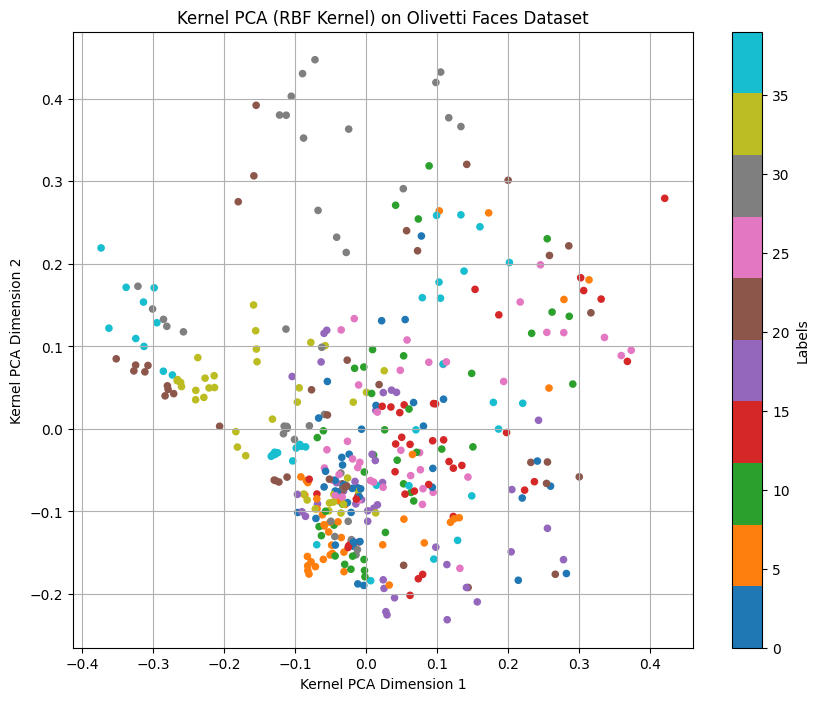

In [7]:
# Import Kernel PCA
from sklearn.decomposition import KernelPCA

# Reduce dimensions using Kernel PCA with an RBF kernel
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, random_state=42)
X_kpca = kernel_pca.fit_transform(X)

# Visualize the Kernel PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("Kernel PCA (RBF Kernel) on Olivetti Faces Dataset")
plt.xlabel("Kernel PCA Dimension 1")
plt.ylabel("Kernel PCA Dimension 2")
plt.grid(True)
plt.show()

#Apply and Visualize Incremental PCA

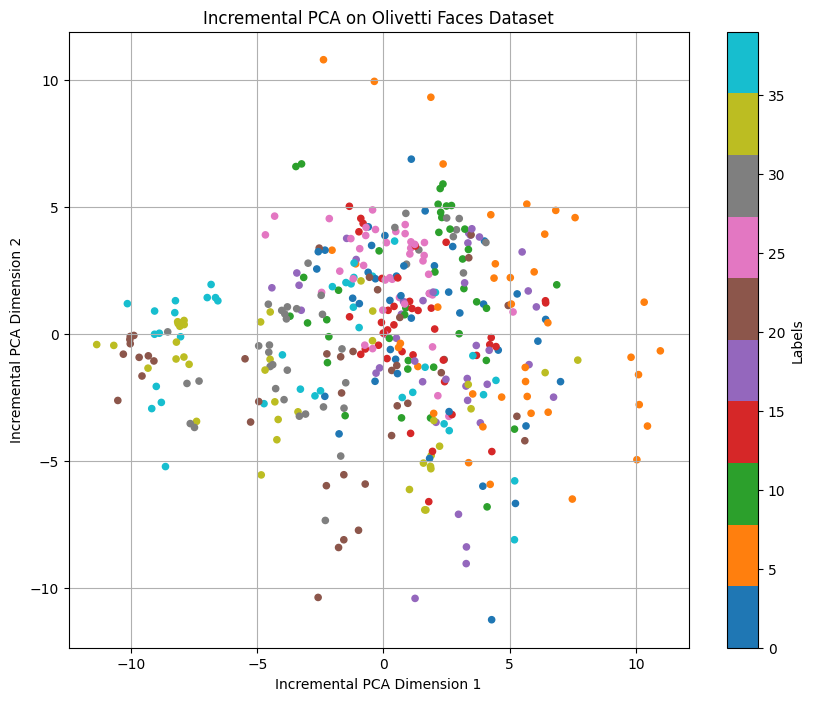

In [8]:
# Import Incremental PCA
from sklearn.decomposition import IncrementalPCA

# Reduce dimensions using Incremental PCA
n_components = 2  # Number of components
incremental_pca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = incremental_pca.fit_transform(X)

# Visualize the Incremental PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("Incremental PCA on Olivetti Faces Dataset")
plt.xlabel("Incremental PCA Dimension 1")
plt.ylabel("Incremental PCA Dimension 2")
plt.grid(True)
plt.show()


#Apply and Visualize Factor Analysis
Factor Analysis is a statistical method used to model the variability in observed variables in terms of a potentially lower number of unobserved latent variables (factors).



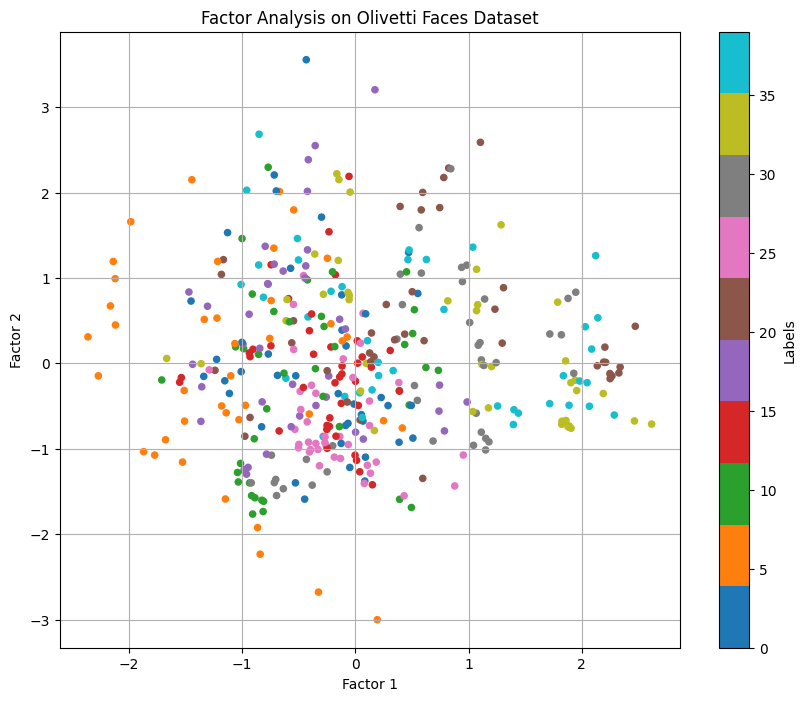

In [9]:
# Import Factor Analysis
from sklearn.decomposition import FactorAnalysis

# Reduce dimensions using Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X)

# Visualize the Factor Analysis results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("Factor Analysis on Olivetti Faces Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.grid(True)
plt.show()

#Apply and Visualize Autoencoders
We will train a simple autoencoder using TensorFlow/Keras to reduce the data to 2 dimensions. The encoder part of the network will act as the dimensionality reduction step.



In [10]:
# Install TensorFlow if necessary
!pip install tensorflow

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


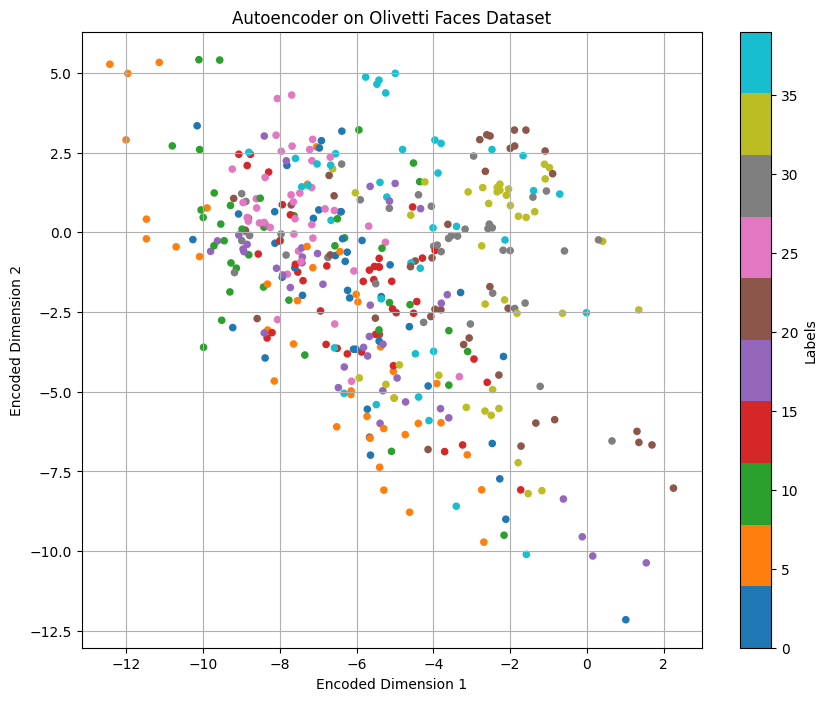

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the autoencoder model
input_dim = X.shape[1]  # Number of input features (4096 for Olivetti Faces)
encoding_dim = 2  # Number of dimensions to reduce to

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded_output = layers.Dense(encoding_dim, activation='linear')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(encoded_output)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded_output = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Combine into an autoencoder model
autoencoder = models.Model(inputs=input_layer, outputs=decoded_output)
encoder = models.Model(inputs=input_layer, outputs=encoded_output)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Reduce the data using the encoder
X_autoencoded = encoder.predict(X)

# Visualize the autoencoded results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='tab10', s=20)
plt.colorbar(scatter, label="Labels")
plt.title("Autoencoder on Olivetti Faces Dataset")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.grid(True)
plt.show()


### Summarize and Comparing Results


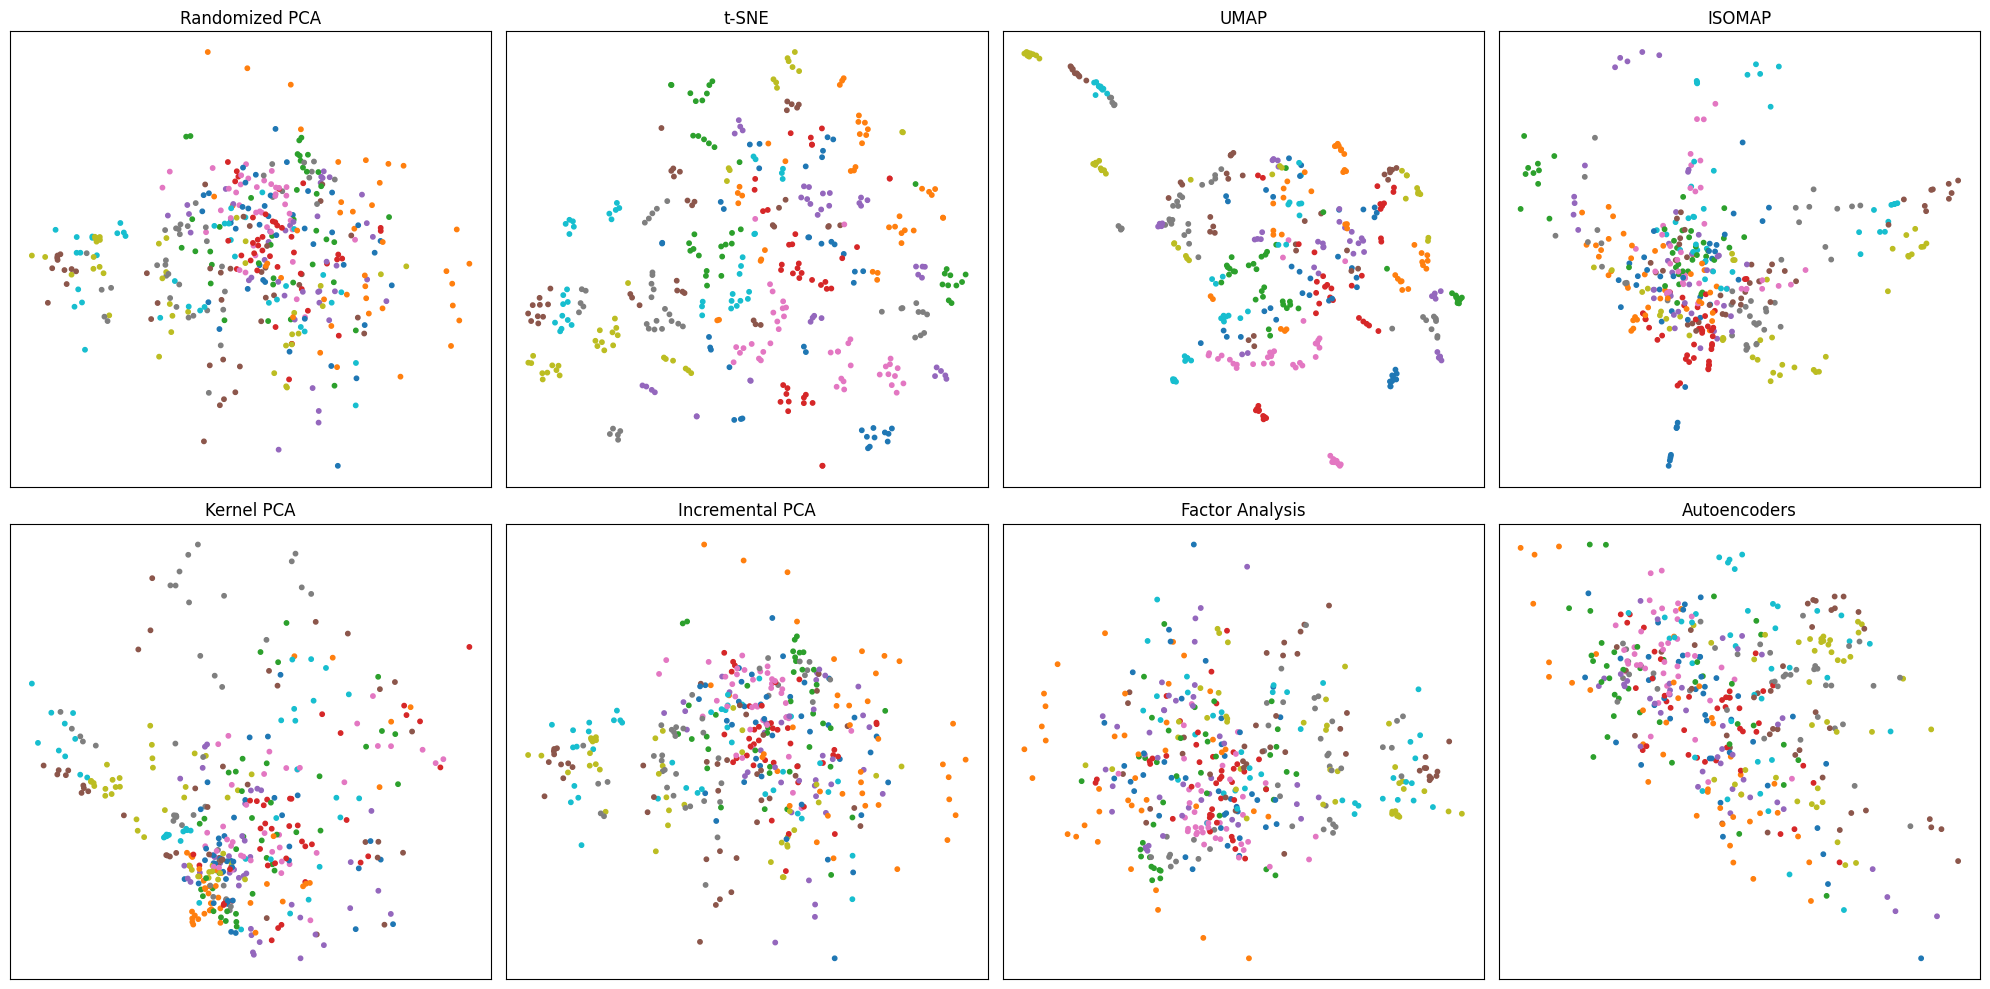

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
techniques = [
    ("Randomized PCA", X_pca),
    ("t-SNE", X_tsne),
    ("UMAP", X_umap),
    ("ISOMAP", X_isomap),
    ("Kernel PCA", X_kpca),
    ("Incremental PCA", X_ipca),
    ("Factor Analysis", X_fa),
    ("Autoencoders", X_autoencoded),
]

for ax, (title, data) in zip(axes.flat, techniques):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='tab10', s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
